# Finding new plot

Pete wants an additional plot for the paper. Want to demonstrate the line profile we get from the model.

Let's try running a simple script in here

In [25]:
%load_ext autoreload
%autoreload 1
%aimport two_sides_figure
%aimport elements_model3d
%pylab inline

pf = two_sides_figure
m3d = model3d

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


This is the current best fit model for fixed limb darkening

In [26]:
x1 = [0.51374991, 0.18869174, 8.5049162065200008, -0.15442891679199999,  0.23553298503299999, 0.063145416345300007, -3.50757872893e+50, 111.002838225]

In [27]:
dir = 'everything/'
files = os.listdir(dir)

sodium_d = [5889.950,5895.924]

time = []
wvl = []
spectra = []
spectra_errors = []
spectra2 = []
spectra_errors2 = []

min_wvl = 5869
max_wvl = 5909

for f in files:
  time += [float(f[:-3])]
  data = pickle.load(open(dir+f,'rb'))
  index = [(data['wvl'] > min_wvl) & (data['wvl'] < max_wvl)]

  wvl += [data['wvl'][index]]
  spectra += [data['spec'][index]]
  spectra_errors += [data['spec_error'][index]]

wvl = wvl[0]
time = np.array(time)
spectra = np.array(spectra)
spectra_errors = np.array(spectra_errors)

planet_K = 154
sodium_d = [5889.950,5895.924]
midtransit = 54341.056842
period =  2.21857312
planet_K = 154
star_K = 0.20196
line_centers = sodium_d
plotting = False
nproc = 16
best_fit=False
save_star = False

i1 = 9
i2 = 29


spectra = spectra[np.argsort(time)]
spectra = spectra[np.arange(i1,i2)]

spectra_errors = spectra_errors[np.argsort(time)]
spectra_errors = spectra_errors[np.arange(i1,i2)]

time = time[np.argsort(time)]
time = time[np.arange(i1,i2)]

new_errors = np.array([np.std(spectra, axis=0)]*20)

spectra_errors = new_errors

load = True
save = True
save_m1 = 'model1.p'
save_m2 = 'model2.p'

In [28]:
model1 = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=3.1)

4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.32967256166 4.17524364486
4.329672561664.329672561664.329672561664.32967256166 4.17524364486
 4.17524364486
 4.17524364486
 4.17524364486


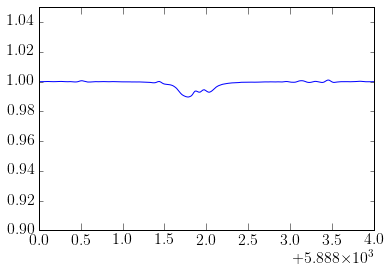

In [24]:
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model1[9][(wvl > 5888) & (wvl < 5892)])
ylim(0.90,1.05)
show()